## PIMA INDIANS DIABETES DATASET
The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):
- Pregnancies (number of times pregnant),
- Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),
- Blood Pressure (Diastolic Blood Pressure in mmHg),
- Skin Thickness (Triceps skin fold thickness in mm),
- Insulin (2 h serum insulin in mu U/ml),
- BMI (Body Mass Index in kg/m2),
- Age (years),
- Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

## PIMA INDIANS AND DIABETES
Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas, and it drawed attention as they had the highest recorded prevalence and incidence of type 2 diabetes (T2DM) of any geographically-defined population (SCHULZ et al, 2015). The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.
## TRICEPS SKIN FOLD THICKNESS
Chandra-Selvi at al (2016) defined adipose tissue as a 'loose connective tissue composed mainly of adipocytes that has an unlimited growth potential at any stage of life, excess of adipose tissue predisposes to many diseases-development of insulin resistance'. Their study found that the skinfold thickness gradually decreased in diabetic patients as the duration of disease increased. However, the Pima Indians Diabetes Dataset does not provide information on the duration of the Diabetes. The researchers discussed the results and concluded that in diabetic patients, there is an efflux of free fatty acids from the adipose tissue, resulting in a decrease of skin fold thickness as the duration of disease increases (CHANDRA-SELVI at al, 2016). Neverthless, there is still very limited prospective information evaluating the relationship of skinfold thickness with incident T2DM (RUIZ-ALEJOS et al, 2020). Triceps skinfold thickness in millimeters for females aged 20 and over and number of examined persons, mean, standard error of the mean, and selected percentiles, by race and ethnicity and age: United States, 2007–2010 (FRYAR et al, 2012).
## OBESITY AND DIABETES
Obesity, assessed by Body Mass Index (BMI), is intimately associated with diabetes and its impact on the development of T2DM has been largely described in large cohort prospective studies (VAN GAAL and SCHEEN, 2015; WILDING, 2014; RUIZ-ALEJOS et al, 2020). In fact, most of the individuals with T2DM are overweight or obese 5. Despite the link between obesity and T2DM not all obese develops diabetes and not all diabetics are obese people. Diabetic lean people probably have a stronger genetic component for T2DM than overweight and obese individuals (WILDING, 2014). Accordingly to Ruiz-Alejos and col (2020) 'there is no specific recommendation about the use of an anthropometric measurement as a marker for T2DM risk prediction besides BMI and waist circumference'. Unfortunately the waist circumference is a measurement not included in the Pima Indians Diabetes Dataset. BMI provides a simple, yet accurate method for indicating nutritional status in adults (as it can be seem in the Table below), and it can be calculated by dividing the individual's weight (in kg) by the square of their height (in metres). bmi
WHO-Europe-Nutrition-Body-mass-index-BMITable. Nutritional Status. Source: World Health Organization.

## OBJECTIVE
The objective of this project is:
Analyse the dataset under the point of view of a Dietitian.
Apply machine learning techniques resulting in bridging the gap between datasets and human knowledge.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

In [2]:
#Loading Data
diabetes=pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Cleaning Data
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
# Min Max Normalization
diabetes[cols]=diabetes[cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))
print("Normalized Data:")
diabetes.head()

Normalized Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [4]:
import tensorflow as tf

# Define your feature columns using Keras preprocessing layers
preg = tf.keras.layers.Input(shape=(1,), name='Pregnancies')
glc = tf.keras.layers.Input(shape=(1,), name='Glucose')
bp = tf.keras.layers.Input(shape=(1,), name='BloodPressure')
st = tf.keras.layers.Input(shape=(1,), name='SkinThickness')
ins = tf.keras.layers.Input(shape=(1,), name='Insulin')
bmi = tf.keras.layers.Input(shape=(1,), name='BMI')
dp = tf.keras.layers.Input(shape=(1,), name='DiabetesPedigreeFunction')
age = tf.keras.layers.Input(shape=(1,), name='Age')
out = tf.keras.layers.Input(shape=(1,), name='Outcome')

<Axes: >

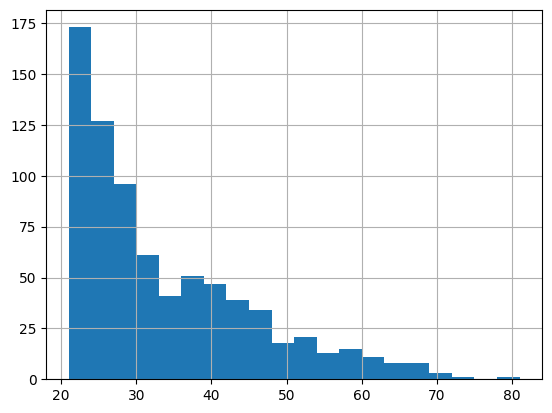

In [5]:
diabetes['Age'].hist(bins=20)

In [6]:
age = tf.feature_column.numeric_column('Age')

out = tf.keras.layers.Input(shape=(1,), name='Outcome')
# Create the bucketized column using the numeric 'age' column
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])
# Create the feature columns list
feat_cols = [preg, glc, bp, st, ins, bmi, dp, age_buckets, out]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [20]:
x_data= diabetes.drop('Outcome',axis=1)
y_data=diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.33,random_state=101)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6553 - loss: 1.7046
Epoch 2/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.6733
Epoch 3/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.6889
Epoch 4/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.6777
Epoch 5/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.6667
Epoch 6/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6410 - loss: 0.6659
Epoch 7/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 0.6589
Epoch 8/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.6745
Epoch 9/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - loss: 0.6615
Epoch 10/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6531 - loss: 0.6560
Epoch 11/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 0.6450
Epoch 12/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [29]:
predictions = model.predict(x_test)
# Predicted values as a list
prediction_values = list(predictions)
prediction_values

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[array([0.2933192], dtype=float32),
 array([0.83660215], dtype=float32),
 array([0.12103636], dtype=float32),
 array([0.38813183], dtype=float32),
 array([0.10711284], dtype=float32),
 array([0.9716179], dtype=float32),
 array([0.7062484], dtype=float32),
 array([0.04725682], dtype=float32),
 array([0.29514554], dtype=float32),
 array([0.39506236], dtype=float32),
 array([0.03873293], dtype=float32),
 array([0.11606339], dtype=float32),
 array([0.18418752], dtype=float32),
 array([0.48633558], dtype=float32),
 array([0.3100626], dtype=float32),
 array([0.7529767], dtype=float32),
 array([0.5958323], dtype=float32),
 array([0.10063036], dtype=float32),
 array([0.38573882], dtype=float32),
 array([0.04120763], dtype=float32),
 array([0.2282389], dtype=float32),
 array([0.451949], dtype=float32),
 array([0.6453056], dtype=float32),
 array([0.35728496], dtype=float32),
 array([0.1667809], dtype=float32),
 array([0.8831138], dtype=float32),
 array([0.08075014], dtype=float32),
 array([0.615

In [37]:
# Evaluate the model
evaluation_result = model.evaluate(x_test, y_test)
# Print evaluation details
print("Evaluation Results:")
for i, metric_name in enumerate(model.metrics_names):
    print(f"{metric_name}: {evaluation_result[i]}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.4725 
Evaluation Results:
loss: 0.478192538022995
compile_metrics: 0.7716535329818726
